In [1]:
%cd ../

/Users/alejandro.jimenez/Documents/reference_repos/titanic-ml-model


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
source_df = pd.read_csv('./data/raw/train.csv')

In [4]:
source_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
import re
import numpy as np

In [6]:
get_cabin_number = lambda x: pd.Series([int(ticket_num) for ticket_num in re.findall("\d+", x)]).mean() if not pd.isnull(x) else np.nan
get_cabin_letter = lambda x: pd.Series.mode(pd.Series([ticket_num for ticket_num in re.findall("[A-Za-z]", x)]))[0] if not pd.isnull(x) else None
get_cabin_size = lambda x: pd.Series([ticket_num for ticket_num in re.findall("[A-Za-z]", x)]).size if not pd.isnull(x) else 0

In [8]:
preprocess_df = source_df.copy()
preprocess_df.columns = preprocess_df.columns.str.lower()

In [9]:
import numpy as np

In [10]:
preprocess_df['cabin_number'] = preprocess_df['cabin'].apply(get_cabin_number)
preprocess_df['cabin_letter'] = preprocess_df['cabin'].apply(get_cabin_letter)
preprocess_df['cabin_size'] = preprocess_df['cabin'].apply(get_cabin_size)

In [11]:
get_ticket_label = lambda x: re.findall("(.*) ", x)[0].strip() if len(re.findall("(.*) ", x))>0 else None
get_ticket_number = lambda x: int(re.findall("^\d+| \d+", x)[0].strip()) if len(re.findall("^\d+| \d+", x)) > 0 else np.nan

In [12]:
preprocess_df['ticket_label'] = preprocess_df['ticket'].apply(get_ticket_label)
preprocess_df['ticket_number'] = preprocess_df['ticket'].apply(get_ticket_number)

mask = preprocess_df['ticket_number'].isnull()
preprocess_df.loc[mask, 'ticket_label'] = preprocess_df.loc[mask, 'ticket']

In [13]:
"asda".split(" ")

['asda']

In [14]:
re.findall("(.*) ", "A/5 21171 ")

['A/5 21171']

In [15]:
preprocess_df.parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [16]:
preprocess_df

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_number,cabin_letter,cabin_size,ticket_label,ticket_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,None,0,A/5,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,1,PC,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,None,0,STON/O2.,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,1,None,113803.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,None,0,None,373450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,None,0,None,211536.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,42.0,B,1,None,112053.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,None,0,W./C.,6607.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,148.0,C,1,None,111369.0


In [17]:
preprocess_df['name_title'] = preprocess_df.name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [18]:
preprocess_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_number,cabin_letter,cabin_size,ticket_label,ticket_number,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,None,0,A/5,21171.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,1,PC,17599.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,None,0,STON/O2.,3101282.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,1,None,113803.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,None,0,None,373450.0,Mr


In [19]:
preprocess_df = preprocess_df.set_index('passengerid')[['pclass','sex','age','sibsp','parch','fare','embarked','cabin_number','cabin_letter','cabin_size','ticket_label','ticket_number','name_title', 'survived']]

In [38]:
# cleaning

In [20]:
preprocess_df['ticket_label'] = preprocess_df['ticket_label'].fillna('OTHER')

In [24]:
preprocess_df.loc[~preprocess_df.ticket_label.isin(preprocess_df.ticket_label.value_counts(1).index[:5].values),'ticket_label'] = 'Misc'

In [32]:
preprocess_df['ticket_number'] = np.log1p(preprocess_df['ticket_number']).fillna(0)

<Axes: xlabel='ticket_number', ylabel='Count'>

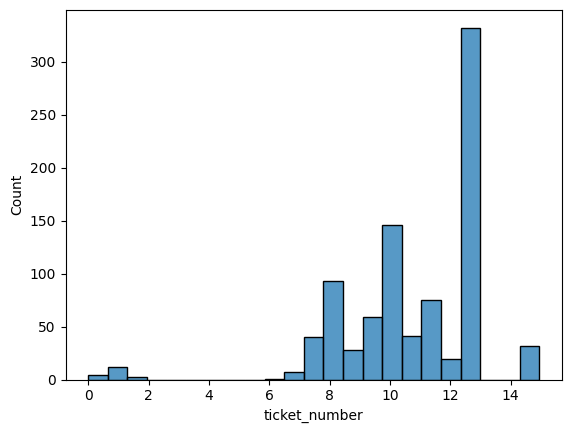

In [34]:
sns.histplot(preprocess_df['ticket_number'])

In [25]:
preprocess_df.ticket_label.value_counts(1)

ticket_label
OTHER        0.741863
Misc         0.135802
PC           0.067340
C.A.         0.030303
STON/O 2.    0.013468
A/5          0.011223
Name: proportion, dtype: float64

In [26]:
preprocess_df.groupby('ticket_label')['survived'].mean()

ticket_label
A/5          0.100000
C.A.         0.481481
Misc         0.247934
OTHER        0.384266
PC           0.650000
STON/O 2.    0.416667
Name: survived, dtype: float64

In [35]:
preprocess_df.isnull().sum()

pclass             0
sex                0
age              177
sibsp              0
parch              0
fare               0
embarked           2
cabin_number     691
cabin_letter     687
cabin_size         0
ticket_label       0
ticket_number      0
name_title         0
survived           0
dtype: int64

In [37]:
preprocess_df.cabin_number.mean()

50.6675

In [36]:
preprocess_df.cabin_letter.unique()

array([None, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)